In [8]:
pip install pandas numpy scikit-learn jieba matplotlib wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Loading HuffPost (English) dataset...
HuffPost columns: ['link', 'headline', 'category', 'short_description', 'authors', 'date']
HuffPost (English) shape: (209527, 2)


,text,language
0,Over 4 Million Americans Roll Up Sleeves For O...,en
1,"American Airlines Flyer Charged, Banned For Li...",en
2,23 Of The Funniest Tweets About Cats And Dogs ...,en
3,The Funniest Tweets From Parents This Week (Se...,en
4,Woman Who Called Cops On Black Bird-Watcher Lo...,en



Loading Chinese dataset...
Chinese dataset columns: ['title', 'desc', 'image', 'url', 'source', 'date']
[Chinese loader] Detected news_collection.csv – using 'desc' as text.
Chinese dataset shape: (142663, 2)


,text,language
0,这个星期，美中两国官员在北京举行了12月特习会以来的首次贸易磋商。这次副部长级别的谈判，不仅...,zh
1,今天(19 日)天氣與昨天(18 日)類似，各地大多仍為多雲到晴的天氣，僅花東地區及中南部山...,zh
2,網路昨晚傳出一支對虐童者動用私刑的假影片，苗栗頭份分局也於第一時間澄清。對此，要求政府必須第...,zh
3,全球關注的第二次川金會，時程已經出爐了。白宮宣布訂於2月底之前舉行、地點還會擇日公開。根據「...,zh
4,中國駐加拿大大使盧沙野17日接受了加中主流媒體的集體採訪。這也是自華為孟晚舟事件在去年年底發...,zh



After subsampling:
English docs: 8000
Chinese docs: 8000

Segmenting Chinese text with Jieba (this may take a moment)...
Sample English text + segmented:


,text,segmented
0,What If We Were All Family Generation Changers...,What If We Were All Family Generation Changers...
1,Firestorm At AOL Over Employee Benefit Cuts It...,Firestorm At AOL Over Employee Benefit Cuts It...
2,Dakota Access Protesters Arrested As Deadline ...,Dakota Access Protesters Arrested As Deadline ...
3,One Glimpse Of These Baby Kit Foxes And You'll...,One Glimpse Of These Baby Kit Foxes And You'll...
4,"Mens' Sweat Pheromone, Androstadienone, Influe...","Mens' Sweat Pheromone, Androstadienone, Influe..."


Sample Chinese text + segmented:


,text,segmented
0,一度橫掃伊拉克與敘利亞，佔領版圖約與整個葡萄牙相當的「伊斯蘭國」(the Islamic S...,一度 橫掃 伊拉克 與 敘利亞 ， 佔 領版圖 約 與 整個 葡萄牙 相當 的 「 伊斯 蘭...
1,最近天气变化无常，很多人感冒了。网络流传，薄荷有治疗感冒的功效。这说法有根据吗？且听本地中医...,最近 天气 变化无常 ， 很多 人 感冒 了 。 网络 流传 ， 薄荷 有 治疗 感冒 的 ...
2,熟悉調查進度的人士透露，歐洲足球總會（UEFA）前會長普拉提尼今天遭到法國警方逮捕。他因卡達...,熟悉 調查 進度 的 人士 透露 ， 歐洲 足球 總會 （ UEFA ） 前會長 普拉提 尼...
3,長榮航空勞資爭議，空服釀罷工。交通部今天下午與長榮資方就工會所提增設勞工董事、禁搭便車充分溝...,長 榮 航空 勞資 爭議 ， 空服 釀罷工 。 交通部 今天下午 與 長 榮資方 就 工會 ...
4,今天是中國六四天安門事件30週年，民進黨台北市議員陳怡君質詢時，詢問1989年6月4日中國發...,今天 是 中國 六四 天安 門 事件 30 週年 ， 民進 黨 台北市 議員陳怡 君質 詢時...



Running LDA for English (HuffPost)...

English Topics (HuffPost)
Topic 1: new | years | people | like | just | women | know | don | trump | 10 | control | parents | american | big | study
Topic 2: health | just | like | court | people | world | look | year | care | yoga | women | photos | child | time | make
Topic 3: trump | year | just | new | life | said | ryan | daughter | things | wall | like | donald | says | donald trump | star
Topic 4: clinton | hillary | trump | know | hillary clinton | new | time | life | photos | just | says | day | people | obama | make
Topic 5: photos | super | time | best | week | bowl | new | world | just | super bowl | day | help | like | love | old
Topic 6: trump | new | day | like | photos | facebook | people | twitter | time | want | make | love | travel | best | check
Topic 7: trump | donald | donald trump | gop | new | republicans | climate | republican | says | president | senate | state | change | wedding | said
Topic 8: new | trump | women | lov

,topic_id,english_avg_weight,chinese_avg_weight
0,1,0.105370,0.048174
1,2,0.115542,0.528987
2,3,0.091608,0.190004
3,4,0.151478,0.036847
4,5,0.098051,0.045484
5,6,0.170203,0.032362
6,7,0.128928,0.083484
7,8,0.138821,0.034659


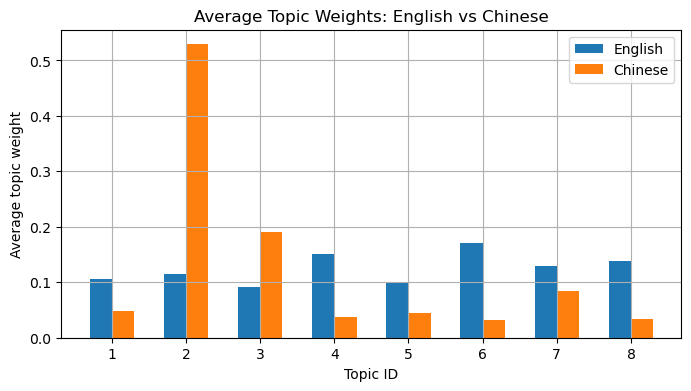

In [9]:
# ============================================================
# DATA 6150 – Individual Project
# Topic Modeling of English & Chinese News (HuffPost + Chinese CSV)
# Author: Wayne Cazell Williams
# ============================================================
# CELL 1 – Imports and global config
# ============================================================
# If needed, install these once in your terminal (NOT in the notebook):
#   pip install pandas numpy scikit-learn jieba matplotlib wordcloud

import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from IPython.display import display  # needed for display(df.head())

try:
    from wordcloud import WordCloud
except ImportError:
    WordCloud = None

# Plot style
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ============================================================
# CELL 2 – File paths (EDIT THESE TWO LINES ONLY)
# ============================================================

HUFFPOST_PATH = "News_Category_Dataset_v3.json"  # HuffPost JSON from Kaggle
CHINESE_PATH  = "news_collection.csv"            # or "yacn_news.csv", etc.

# Limit documents per language (protects your laptop from RAM issues)
MAX_DOCS_PER_LANG = 8000  # you can lower to 3000–5000 if needed

# ============================================================
# CELL 3 – Basic text cleaning helper
# ============================================================
def clean_text_basic(text):
    """Simple whitespace cleanup and type safety."""
    if not isinstance(text, str):
        return ""
    text = text.strip()
    text = re.sub(r"\s+", " ", text)
    return text


# ============================================================
# CELL 4 – Load HuffPost (English)
# ============================================================
def load_huffpost(path: str) -> pd.DataFrame:
    """
    Load HuffPost News Category Dataset.

    - JSONL (Kaggle default) or CSV.
    - Uses headline + short_description as text.
    """
    if not os.path.exists(path):
        raise FileNotFoundError(
            f"HuffPost file not found at: {path}\n"
            f"Make sure the file is in the SAME folder as this notebook "
            f"and that HUFFPOST_PATH matches the filename exactly."
        )

    ext = os.path.splitext(path)[1].lower()
    if ext == ".json":
        df = pd.read_json(path, lines=True)
    else:
        df = pd.read_csv(path)

    print("HuffPost columns:", df.columns.tolist())

    if "headline" not in df.columns:
        raise ValueError(
            "Could not find column 'headline' in HuffPost dataset. "
            "Check the printed columns and adjust the code if needed."
        )

    if "short_description" not in df.columns:
        df["short_description"] = ""

    df["text"] = (
        df["headline"].fillna("") + " " +
        df["short_description"].fillna("")
    )
    df["text"] = df["text"].astype(str).apply(clean_text_basic)
    df["language"] = "en"

    return df[["text", "language"]]


print("Loading HuffPost (English) dataset...")
df_en = load_huffpost(HUFFPOST_PATH)
print("HuffPost (English) shape:", df_en.shape)
display(df_en.head())


# ============================================================
# CELL 5 – Load Chinese dataset (YACND or news_collection.csv)
# ============================================================
def load_chinese_news(path: str) -> pd.DataFrame:
    """
    Load Chinese news from CSV.

    - If filename contains 'news_collection', we use 'desc' column (your upload).
    - Otherwise:
        - Prefer 'text', 'content', 'article', or 'body' if present.
        - If none found, pick the column with longest average string length.
    """
    if not os.path.exists(path):
        raise FileNotFoundError(
            f"Chinese file not found at: {path}\n"
            f"Make sure the file is in the SAME folder as this notebook "
            f"and that CHINESE_PATH matches the filename exactly."
        )

    df = pd.read_csv(path)
    print("Chinese dataset columns:", df.columns.tolist())

    filename = os.path.basename(path).lower()

    if "news_collection" in filename:
        # Your uploaded file has 'desc' as article body
        text_col = "desc"
        if text_col not in df.columns:
            raise ValueError(
                f"Expected 'desc' column in news_collection.csv, "
                f"but got: {df.columns.tolist()}"
            )
        print(f"[Chinese loader] Detected news_collection.csv – using '{text_col}' as text.")
    else:
        # Generic case (e.g., YACND style)
        preferred_cols = [c for c in ["text", "content", "article", "body"] if c in df.columns]
        if preferred_cols:
            text_col = preferred_cols[0]
            print(f"[Chinese loader] Using preferred text column: '{text_col}'")
        else:
            avg_len = {c: df[c].astype(str).map(len).mean() for c in df.columns}
            text_col = max(avg_len, key=avg_len.get)
            print(f"[Chinese loader] No standard text column; using longest column: '{text_col}'")

    df["text"] = df[text_col].astype(str).apply(clean_text_basic)
    df["language"] = "zh"
    return df[["text", "language"]]


print("\nLoading Chinese dataset...")
df_zh = load_chinese_news(CHINESE_PATH)
print("Chinese dataset shape:", df_zh.shape)
display(df_zh.head())


# ============================================================
# CELL 6 – Optional subsample (for speed and stability)
# ============================================================
def subsample_df(df: pd.DataFrame, max_docs: int) -> pd.DataFrame:
    """Subsample df to at most max_docs documents."""
    if len(df) > max_docs:
        return df.sample(max_docs, random_state=SEED).reset_index(drop=True)
    return df.reset_index(drop=True)


df_en = subsample_df(df_en, MAX_DOCS_PER_LANG)
df_zh = subsample_df(df_zh, MAX_DOCS_PER_LANG)

print("\nAfter subsampling:")
print("English docs:", len(df_en))
print("Chinese docs:", len(df_zh))


# ============================================================
# CELL 7 – Chinese segmentation with Jieba
# ============================================================
def jieba_cut(text: str) -> str:
    """Segment Chinese text using Jieba and join tokens with spaces."""
    if not isinstance(text, str):
        return ""
    tokens = jieba.lcut(text)
    return " ".join(tokens)


print("\nSegmenting Chinese text with Jieba (this may take a moment)...")
df_zh["segmented"] = df_zh["text"].apply(jieba_cut)

# English: keep as-is
df_en["segmented"] = df_en["text"]

print("Sample English text + segmented:")
display(df_en[["text", "segmented"]].head())

print("Sample Chinese text + segmented:")
display(df_zh[["text", "segmented"]].head())


# ============================================================
# CELL 8 – TF-IDF + LDA helpers
# ============================================================
def run_lda_for_language(
    texts,
    language: str,
    n_topics: int = 8,
    max_features: int = 8000
):
    """
    Build TF-IDF and LDA for a given language.

    Returns:
        vectorizer, lda_model, X_tfidf
    """
    if language == "zh":
        # Chinese already segmented and space-separated
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            token_pattern=r"(?u)\b\w+\b"
        )
    else:
        # English: remove stopwords, include unigrams + bigrams
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words="english",
            ngram_range=(1, 2)
        )

    X_tfidf = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=20,
        learning_method="batch",
        random_state=SEED,
        n_jobs=-1
    )
    lda.fit(X_tfidf)

    return vectorizer, lda, X_tfidf


def print_top_words(
    lda_model,
    feature_names,
    n_top_words: int = 15,
    title: str = "Topics"
):
    """Print top words for each topic in an LDA model."""
    print("\n" + "=" * 60)
    print(title)
    print("=" * 60)
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_terms = [feature_names[i] for i in top_indices]
        print(f"Topic {topic_idx + 1}: {' | '.join(top_terms)}")
    print("=" * 60)


# ============================================================
# CELL 9 – LDA for English (HuffPost)
# ============================================================
N_TOPICS_EN = 8  # adjust to 6–10 if you want to experiment

print("\nRunning LDA for English (HuffPost)...")
tfidf_en, lda_en, X_en = run_lda_for_language(
    df_en["segmented"].tolist(),
    language="en",
    n_topics=N_TOPICS_EN,
    max_features=8000
)

feature_names_en = tfidf_en.get_feature_names_out()
print_top_words(
    lda_en,
    feature_names_en,
    n_top_words=15,
    title="English Topics (HuffPost)"
)


# ============================================================
# CELL 10 – LDA for Chinese
# ============================================================
N_TOPICS_ZH = 8  # keep same as English for clean comparison

print("\nRunning LDA for Chinese...")
tfidf_zh, lda_zh, X_zh = run_lda_for_language(
    df_zh["segmented"].tolist(),
    language="zh",
    n_topics=N_TOPICS_ZH,
    max_features=8000
)

feature_names_zh = tfidf_zh.get_feature_names_out()
print_top_words(
    lda_zh,
    feature_names_zh,
    n_top_words=15,
    title="Chinese Topics"
)


# ============================================================
# CELL 11 – Average topic weights (for summary tables)
# ============================================================
def get_topic_distribution(lda_model, X):
    """Return document-topic probability matrix."""
    return lda_model.transform(X)

doc_topic_en = get_topic_distribution(lda_en, X_en)
doc_topic_zh = get_topic_distribution(lda_zh, X_zh)

avg_topic_en = doc_topic_en.mean(axis=0)
avg_topic_zh = doc_topic_zh.mean(axis=0)

print("\nAverage English topic weights:", np.round(avg_topic_en, 3))
print("Average Chinese topic weights:", np.round(avg_topic_zh, 3))

df_topic_summary = pd.DataFrame({
    "topic_id": np.arange(1, max(N_TOPICS_EN, N_TOPICS_ZH) + 1),
    "english_avg_weight": np.concatenate(
        [avg_topic_en, [np.nan] * (max(N_TOPICS_EN, N_TOPICS_ZH) - N_TOPICS_EN)]
    ),
    "chinese_avg_weight": np.concatenate(
        [avg_topic_zh, [np.nan] * (max(N_TOPICS_EN, N_TOPICS_ZH) - N_TOPICS_ZH)]
    )
})

print("\nTopic weight summary (for your paper's tables/figures):")
display(df_topic_summary)


# ============================================================
# CELL 12 – Simple bar plot of topic weights (optional figure)
# ============================================================
topic_ids = np.arange(1, max(N_TOPICS_EN, N_TOPICS_ZH) + 1)

plt.figure()
plt.bar(topic_ids - 0.15, avg_topic_en, width=0.3, label="English")
plt.bar(topic_ids + 0.15, avg_topic_zh, width=0.3, label="Chinese")
plt.xlabel("Topic ID")
plt.ylabel("Average topic weight")
plt.title("Average Topic Weights: English vs Chinese")
plt.legend()
plt.show()


# ============================================================
# CELL 13 – Word clouds for topics (optional)
# ============================================================
def show_topic_wordcloud(
    lda_model,
    feature_names,
    topic_idx: int,
    language: str = "en",
    font_path: str = None
):
    """Generate and display a word cloud for a given topic."""
    if WordCloud is None:
        print("WordCloud not available. Install 'wordcloud' to use this feature.")
        return

    topic = lda_model.components_[topic_idx]
    freqs = {feature_names[i]: float(topic[i]) for i in range(len(feature_names))}

    # For Chinese, you MUST supply a valid CJK font
    if language == "zh" and font_path is None:
        print("For Chinese word clouds, provide a font_path that supports Chinese.")
        return

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        font_path=font_path
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{language.upper()} Topic #{topic_idx + 1}")
    plt.show()


# Example usage (uncomment to create figures):
# show_topic_wordcloud(lda_en, feature_names_en, topic_idx=0, language="en")

# For Chinese, set font_path to a Chinese font installed on your system, e.g.:
# CHINESE_FONT_PATH = r"C:\Windows\Fonts\msyh.ttc"  # example for Windows
# show_topic_wordcloud(lda_zh, feature_names_zh, topic_idx=0,
#                      language="zh", font_path=CHINESE_FONT_PATH)
